In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_diet_data.csv")

# Display the first few rows
print(df.head())

   Age  Gender  Weight_kg  Height_cm   BMI  Disease_Type  Severity  \
0   56       1       58.4        160  22.8       Obesity  Moderate   
1   69       1      101.2        169  35.4      Diabetes      Mild   
2   46       0       63.5        173  21.2  Hypertension      Mild   
3   32       1       58.1        164  21.6           NaN      Mild   
4   60       1       79.5        197  20.5      Diabetes  Moderate   

  Physical_Activity_Level  Daily_Caloric_Intake  Cholesterol_mg/dL  \
0                Moderate                  3079              173.3   
1                Moderate                  3032              199.2   
2               Sedentary                  1737              181.0   
3                Moderate                  2657              168.2   
4               Sedentary                  3496              200.4   

   Blood_Pressure_mmHg  Glucose_mg/dL Dietary_Restrictions Allergies  \
0                  133          116.3                  NaN   Peanuts   
1             

In [2]:
# Show dataset information
print(df.info())

# Show summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1000 non-null   int64  
 1   Gender                            1000 non-null   int64  
 2   Weight_kg                         1000 non-null   float64
 3   Height_cm                         1000 non-null   int64  
 4   BMI                               1000 non-null   float64
 5   Disease_Type                      796 non-null    object 
 6   Severity                          1000 non-null   object 
 7   Physical_Activity_Level           1000 non-null   object 
 8   Daily_Caloric_Intake              1000 non-null   int64  
 9   Cholesterol_mg/dL                 1000 non-null   float64
 10  Blood_Pressure_mmHg               1000 non-null   int64  
 11  Glucose_mg/dL                     1000 non-null   float64
 12  Dietary

In [3]:
print(df.isnull().sum())

Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
Calculated_BMI                        0
dtype: int64


In [4]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

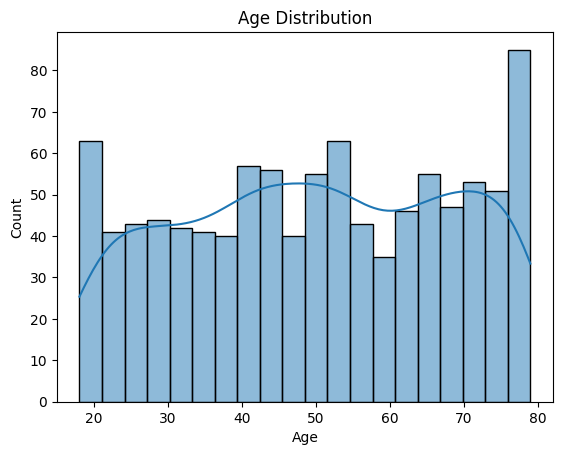

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

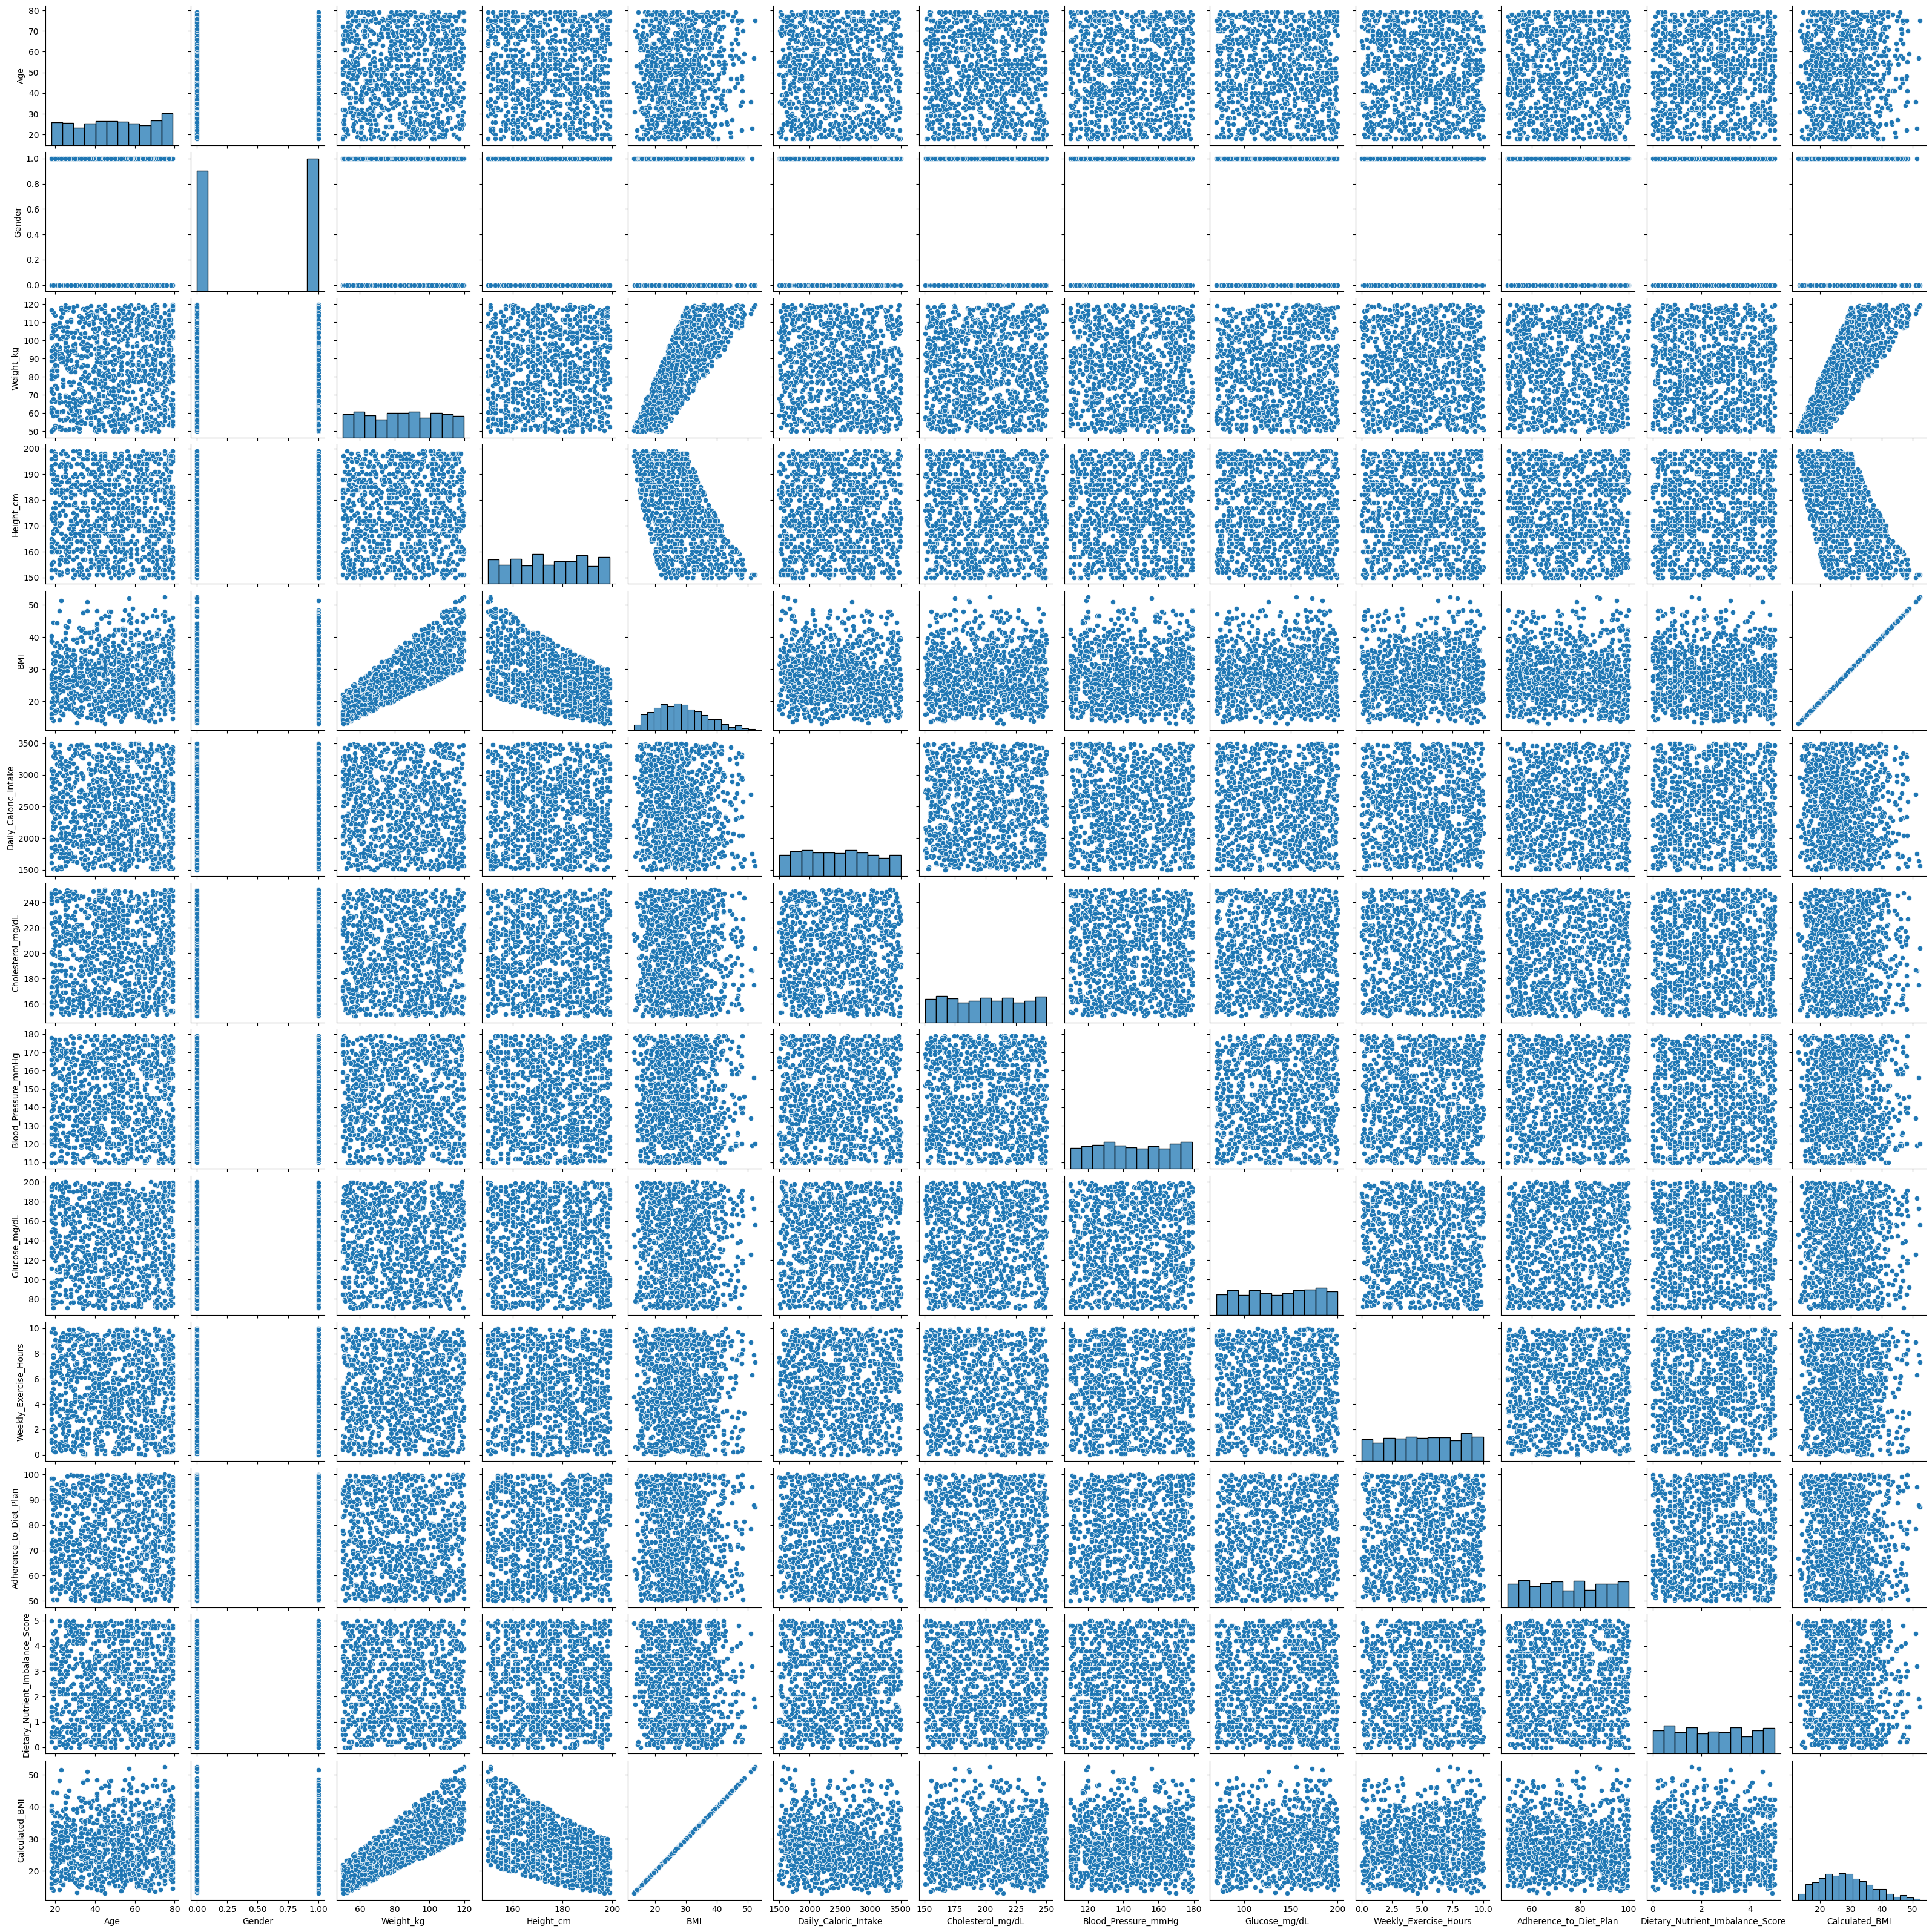

In [6]:
sns.pairplot(df)
plt.show()

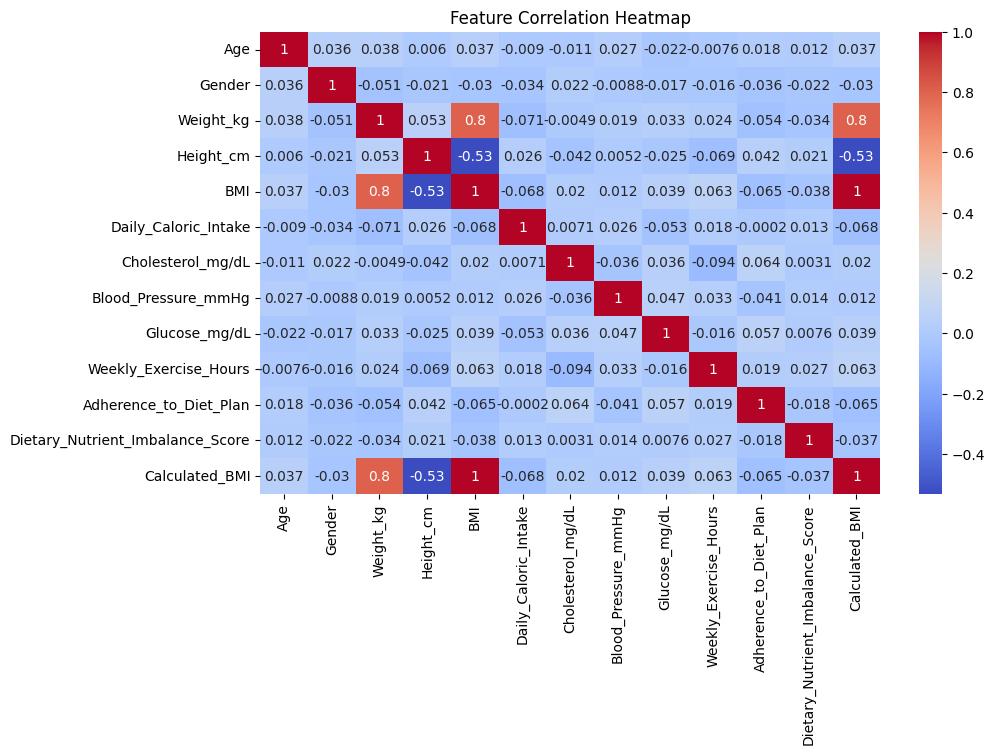

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
print(df.dtypes)  # Check data types of all columns
print(df.select_dtypes(include=['number']).columns)  # Verify numeric columns

Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                         object
Severity                             object
Physical_Activity_Level              object
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                 object
Allergies                            object
Preferred_Cuisine                    object
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                  object
Calculated_BMI                      float64
dtype: object
Index(['Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI',
       'Daily_Caloric_Intake', 'Cholesterol_mg/dL

In [9]:
# Define X and y properly
X = df.drop(columns=["Diet_Recommendation"])  # Features
y = df["Diet_Recommendation"]  # Target

# Convert all features in X to numeric (to avoid errors)
X = X.apply(pd.to_numeric, errors="coerce")

# Debugging: Check if X is correctly defined
print("✅ Feature Columns (X):", X.columns.tolist())  
print("\n✅ Data Types:\n", X.dtypes)  
print("\n✅ Sample Data:\n", X.head())  

✅ Feature Columns (X): ['Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Disease_Type', 'Severity', 'Physical_Activity_Level', 'Daily_Caloric_Intake', 'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL', 'Dietary_Restrictions', 'Allergies', 'Preferred_Cuisine', 'Weekly_Exercise_Hours', 'Adherence_to_Diet_Plan', 'Dietary_Nutrient_Imbalance_Score', 'Calculated_BMI']

✅ Data Types:
 Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                        float64
Severity                            float64
Physical_Activity_Level             float64
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                float64
Allergies                          

In [10]:
# Drop non-numeric columns (e.g., ID or unnecessary columns)
if "ID" in df.columns:  # Change "ID" to actual column name if different
    df.drop(columns=["ID"], inplace=True)

In [11]:
X = df.drop(columns=["Diet_Recommendation"])  # Drop target column

# Convert all columns in X to numeric (to avoid string errors)
X = X.apply(pd.to_numeric, errors="coerce")

print("Final Data Types After Conversion:\n", X.dtypes)  # Check if conversion worked

Final Data Types After Conversion:
 Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                        float64
Severity                            float64
Physical_Activity_Level             float64
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                float64
Allergies                           float64
Preferred_Cuisine                   float64
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Calculated_BMI                      float64
dtype: object


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cleaned_diet_data.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Display first few rows
df.head()


Age  Gender  Weight_kg  Height_cm   BMI  Disease_Type  Severity  \
0   56       1       58.4        160  22.8       Obesity  Moderate   
1   69       1      101.2        169  35.4      Diabetes      Mild   
2   46       0       63.5        173  21.2  Hypertension      Mild   
3   32       1       58.1        164  21.6           NaN      Mild   
4   60       1       79.5        197  20.5      Diabetes  Moderate   

  Physical_Activity_Level  Daily_Caloric_Intake  Cholesterol_mg/dL  \
0                Moderate                  3079              173.3   
1                Moderate                  3032              199.2   
2               Sedentary                  1737              181.0   
3                Moderate                  2657              168.2   
4               Sedentary                  3496              200.4   

   Blood_Pressure_mmHg  Glucose_mg/dL Dietary_Restrictions Allergies  \
0                  133          116.3                  NaN   Peanuts   
1                  120          137.1                  NaN   Peanuts   
2                  121          109.6                  NaN   Peanuts   
3                  144          159.4                  NaN       NaN   
4                  172          182.3            Low_Sugar       NaN   

  Preferred_Cuisine  Weekly_Exercise_Hours  Adherence_to_Diet_Plan  \
0           Mexican                    3.1                    96.6   
1           Chinese                    4.5                    63.2   
2           Chinese                    3.8                    57.5   
3           Mexican                    4.3                    54.5   
4           Italian                    9.8                    78.2   

   Dietary_Nutrient_Imbalance_Score Diet_Recommendation  Calculated_BMI  
0                               3.1            Balanced       22.812500  
1                               0.6            Low_Carb       35.432933  
2                               4.6          Low_Sodium       21.216880  
3                               0.4            Balanced       21.601725  
4                               4.7            Low_Carb       20.484939

In [13]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert numeric columns to float
numeric_columns = ["Age", "Height_cm", "Weight_kg", "BMI"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values in numeric columns with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check dataset after cleaning
df.info()

Missing Values:
 Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
Calculated_BMI                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
-

In [14]:
# Basic statistics
df.describe()

Age       Gender    Weight_kg   Height_cm          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean     49.857000     0.523000    84.602400   174.81700    28.191600   
std      18.114267     0.499721    20.088121    14.33377     8.040136   
min      18.000000     0.000000    50.000000   150.00000    13.000000   
25%      35.000000     0.000000    66.600000   162.00000    22.075000   
50%      50.000000     1.000000    85.200000   175.00000    27.450000   
75%      66.000000     1.000000   102.000000   187.00000    33.425000   
max      79.000000     1.000000   119.700000   199.00000    52.400000   

       Daily_Caloric_Intake  Cholesterol_mg/dL  Blood_Pressure_mmHg  \
count           1000.000000        1000.000000          1000.000000   
mean            2475.064000         199.717900           144.993000   
std              565.017032          29.080614            20.245712   
min             1500.000000         150.400000           110.000000   
25%             1984.750000         174.300000           128.000000   
50%             2470.500000         199.850000           145.000000   
75%             2937.250000         224.850000           163.000000   
max             3498.000000         249.900000           179.000000   

       Glucose_mg/dL  Weekly_Exercise_Hours  Adherence_to_Diet_Plan  \
count    1000.000000            1000.000000              1000.00000   
mean      136.867600               5.166000                74.88430   
std        37.934819               2.847995                14.82638   
min        70.200000               0.000000                50.00000   
25%       105.000000               2.800000                62.00000   
50%       138.000000               5.200000                74.20000   
75%       170.650000               7.600000                88.20000   
max       200.000000              10.000000               100.00000   

       Dietary_Nutrient_Imbalance_Score  Calculated_BMI  
count                       1000.000000     1000.000000  
mean                           2.469200       28.192406  
std                            1.459631        8.039043  
min                            0.000000       13.012446  
25%                            1.200000       22.060348  
50%                            2.400000       27.444971  
75%                            3.700000       33.449921  
max                            5.000000       52.409982

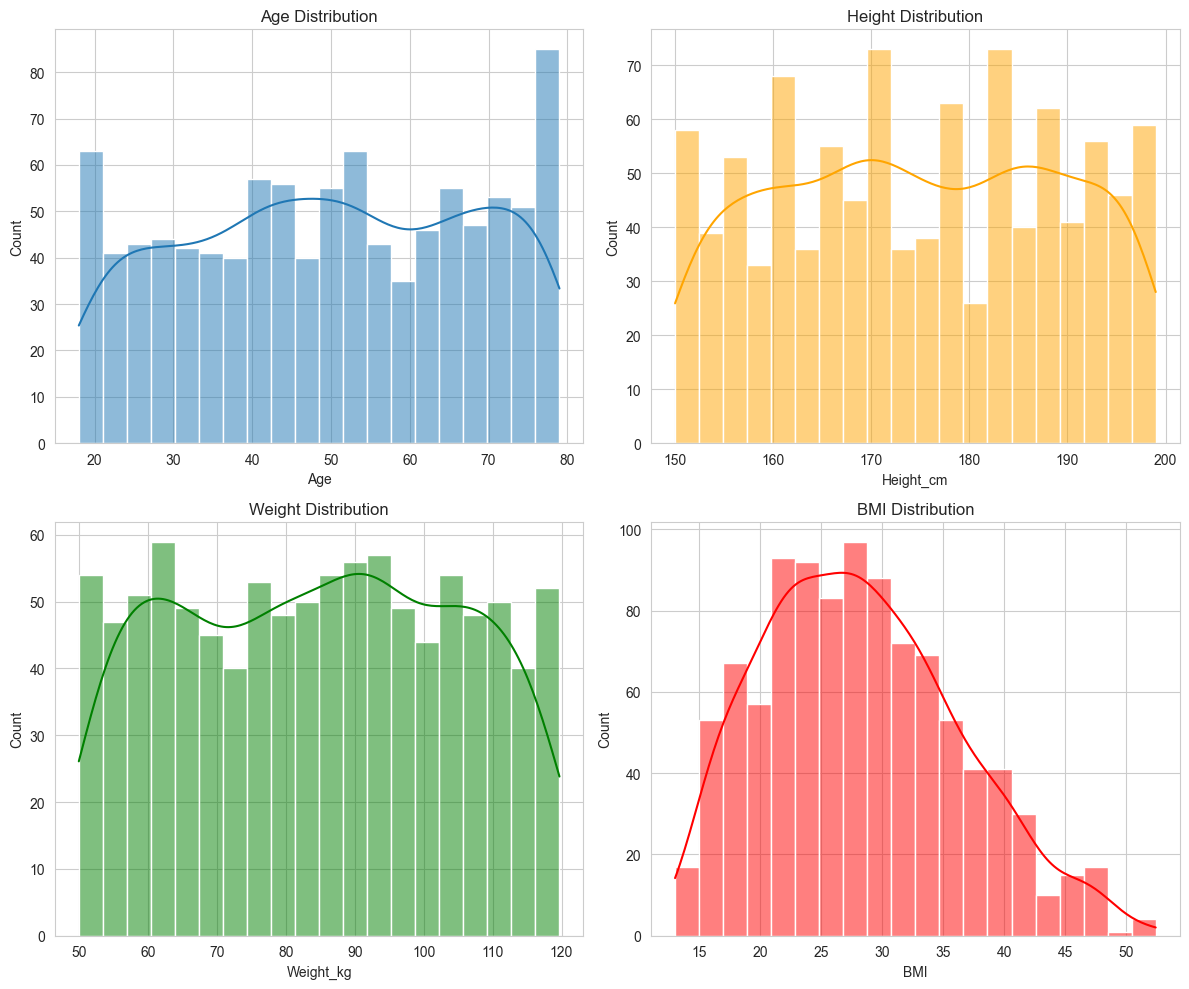

In [15]:
# Set style
sns.set_style("whitegrid")

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

sns.histplot(df["Height_cm"], bins=20, kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Height Distribution")

sns.histplot(df["Weight_kg"], bins=20, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Weight Distribution")

sns.histplot(df["BMI"], bins=20, kde=True, ax=axes[1, 1], color="red")
axes[1, 1].set_title("BMI Distribution")

plt.tight_layout()
plt.show()


In [16]:
print(df.dtypes)

Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                         object
Severity                             object
Physical_Activity_Level              object
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                 object
Allergies                            object
Preferred_Cuisine                    object
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                  object
Calculated_BMI                      float64
dtype: object


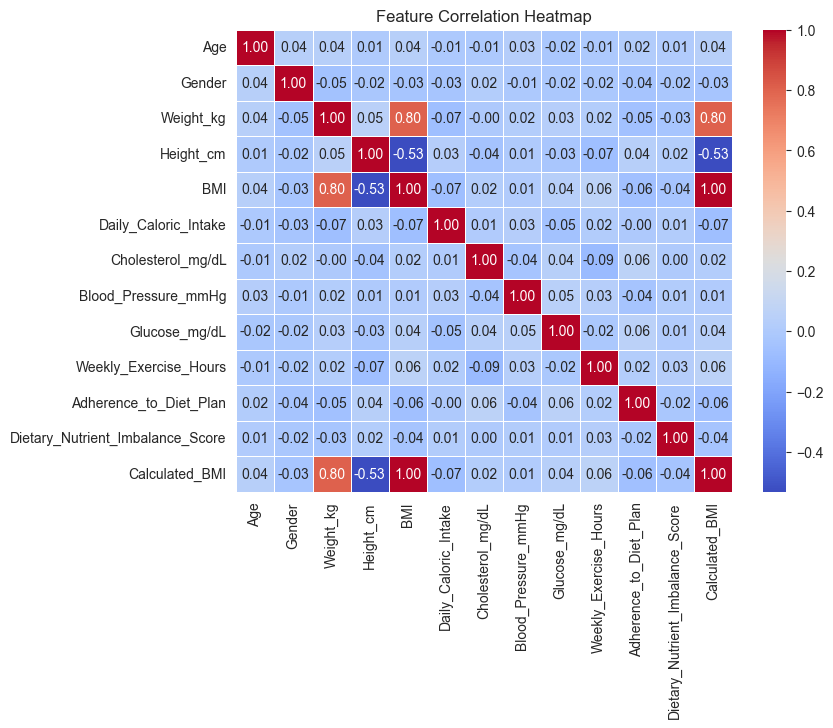

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
df.drop(columns=["Patient_ID"], errors="ignore", inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender (Male → 1, Female → 0)
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

# Save label encoder for later use
import pickle
with open("label_encoder_gender.pkl", "wb") as file:
    pickle.dump(le_gender, file)

print("✅ Gender encoded successfully!")

✅ Gender encoded successfully!


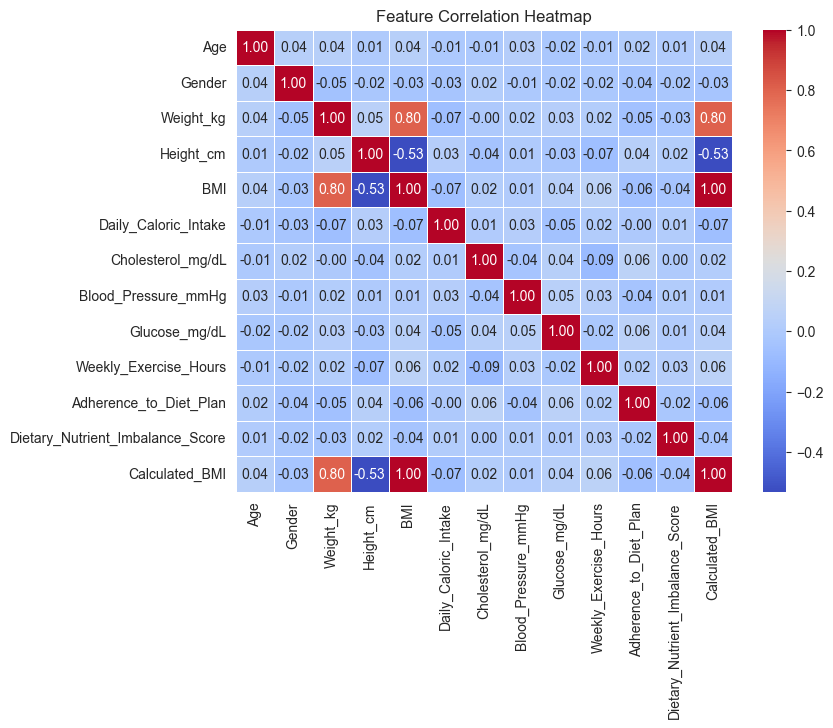

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
print(df.dtypes)

Age                                   int64
Gender                                int64
Weight_kg                           float64
Height_cm                             int64
BMI                                 float64
Disease_Type                         object
Severity                             object
Physical_Activity_Level              object
Daily_Caloric_Intake                  int64
Cholesterol_mg/dL                   float64
Blood_Pressure_mmHg                   int64
Glucose_mg/dL                       float64
Dietary_Restrictions                 object
Allergies                            object
Preferred_Cuisine                    object
Weekly_Exercise_Hours               float64
Adherence_to_Diet_Plan              float64
Dietary_Nutrient_Imbalance_Score    float64
Diet_Recommendation                  object
Calculated_BMI                      float64
dtype: object


C:\Users\Impana\AppData\Local\Temp\ipykernel_25424\1509219506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="pastel")


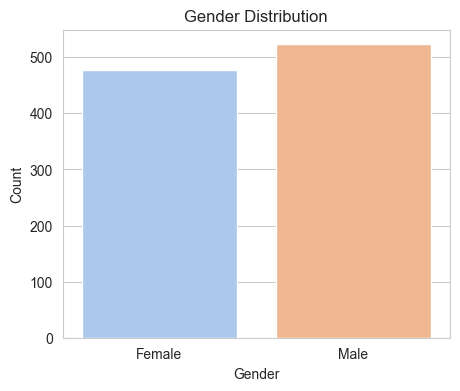

In [22]:
# Countplot for Gender
plt.figure(figsize=(5, 4))
sns.countplot(x=df["Gender"], palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

In [23]:
# Check if BMI is correctly calculated
df["Calculated_BMI"] = df["Weight_kg"] / ((df["Height_cm"] / 100) ** 2)

# Compare original vs calculated BMI
df[["BMI", "Calculated_BMI"]].head(10)

BMI  Calculated_BMI
0  22.8       22.812500
1  35.4       35.432933
2  21.2       21.216880
3  21.6       21.601725
4  20.5       20.484939
5  43.4       43.433596
6  35.4       35.363322
7  14.7       14.747403
8  26.7       26.742857
9  23.2       23.248946

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender: Female = 0, Male = 1
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

# Save label encoder for later use
import pickle
with open("label_encoder_gender.pkl", "wb") as file:
    pickle.dump(le_gender, file)

# Save cleaned dataset
df.to_csv("cleaned_diet_data.csv", index=False)
print("✅ Data cleaned and saved as 'cleaned_diet_data.csv'")

✅ Data cleaned and saved as 'cleaned_diet_data.csv'


In [25]:
print("✅ Encoded Gender Classes:", le_gender.classes_)  

✅ Encoded Gender Classes: [0 1]
